<a href="https://colab.research.google.com/github/ImmortalizedInHearts/NeuralNetwork/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

from tqdm import tqdm

In [2]:
mat = scipy.io.loadmat('data.mat')
trainInputs = np.array(mat['data']['test'][0][0][0][0][0])
trainTargets = np.array(mat['data']['test'][0][0][0][0][1])

testInputs = np.array(mat['data']['training'][0][0][0][0][0])
testTargets = np.array(mat['data']['training'][0][0][0][0][1])

validationInputs = np.array(mat['data']['validation'][0][0][0][0][1])
validationTargets = np.array(mat['data']['validation'][0][0][0][0][0])

In [30]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
  return np.exp(x) / np.exp(x).sum(axis=0)

def crossEntropyLoss(y_true, y_pred):
  loss = -y_true[y_true == 1] @ np.log(y_pred[y_true == 1] + 1e-15)
  return loss / len(y_true)

def targetsSearch(data):
  predict = NN.feedforward(data)[1]
  return [np.argmax(item) for item in predict.T]


In [76]:
class NeuralNetwork:

  def __init__(self, k):

    self.k = k

    self.loss = list()
  
  def feedforward(self, data):
    h = sigmoid(self.k[0] @ data)
    y = softmax(self.k[1] @ h)
    return [h,y]
  
  def train(self, data, y_true):
    alpha = 0.01
    epochs = 1000

    for epoch in tqdm(range(epochs)):

      forward = self.feedforward(data) 
      hidden = forward[0]
      predict = forward[1]

      """backprop"""
      derivLoss = -y_true / predict
      derivSoftmax = predict * (derivLoss - (derivLoss * predict).sum(axis=0))
      dL_dk2 = derivSoftmax @ hidden.T
      

      derivHidden = self.k[1].T @ derivSoftmax
      derivSigmoid = hidden * (1 - hidden) * derivHidden
      dL_dk1 = derivSigmoid @ data.T 
      

      self.k[0] -= alpha * dL_dk1 / len(data)
      self.k[1] -= alpha * dL_dk2 / len(data)

      self.loss.append(crossEntropyLoss(y_true.T, predict.T))

In [77]:
kParameters = [np.random.randn(128, 256) * np.sqrt(2/256), np.random.randn(10, 128) * np.sqrt(2/128)]
NN = NeuralNetwork(kParameters)
NN.train(trainInputs, trainTargets)

100%|██████████| 1000/1000 [01:53<00:00,  8.82it/s]


In [78]:
confMatrixTest = [[0 for i in range(10)] for j in range(10)]
confMatrixTrain = [[0 for i in range(10)] for j in range(10)]
confMatrixValidation = [[0 for i in range(10)] for j in range(10)]

testPredictions = targetsSearch(testInputs)
validationPredictions = targetsSearch(validationInputs)
trainPredictions = targetsSearch(trainInputs)


for index in range(len(trainPredictions)):
  if index < 1000:
    confMatrixTest[np.argmax(testTargets.T[index])][testPredictions[index]] += 1
    confMatrixValidation[np.argmax(validationTargets.T[index])][validationPredictions[index]] += 1
  confMatrixTrain[np.argmax(trainTargets.T[index])][trainPredictions[index]] += 1

In [79]:
print(np.mean([confMatrixTest[i][i] for i in range(10)]))
confMatrixTest

93.9


[[92, 1, 0, 0, 1, 1, 1, 1, 3, 0],
 [1, 97, 0, 0, 0, 0, 0, 0, 2, 0],
 [1, 1, 92, 0, 0, 0, 4, 0, 2, 0],
 [1, 0, 1, 90, 0, 3, 1, 0, 3, 1],
 [0, 1, 1, 0, 93, 0, 1, 0, 0, 4],
 [1, 1, 0, 2, 0, 93, 0, 0, 3, 0],
 [1, 0, 1, 0, 2, 0, 96, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 98, 0, 2],
 [0, 1, 0, 0, 0, 1, 0, 1, 97, 0],
 [0, 1, 1, 0, 4, 0, 0, 2, 1, 91]]

In [80]:
print(np.mean([confMatrixValidation[i][i] for i in range(10)]))
confMatrixValidation

94.1


[[95, 0, 0, 0, 2, 0, 1, 0, 2, 0],
 [0, 97, 0, 1, 0, 0, 0, 0, 2, 0],
 [0, 0, 93, 1, 1, 0, 1, 0, 4, 0],
 [0, 0, 1, 93, 0, 5, 0, 0, 1, 0],
 [0, 1, 0, 0, 93, 0, 6, 0, 0, 0],
 [1, 1, 2, 3, 0, 87, 1, 2, 3, 0],
 [0, 1, 1, 0, 2, 0, 96, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 95, 0, 4],
 [0, 2, 0, 0, 1, 2, 0, 0, 95, 0],
 [0, 0, 0, 1, 2, 0, 0, 0, 0, 97]]

In [81]:
print(np.mean([confMatrixTrain[i][i] for i in range(10)]))
confMatrixTrain

861.2


[[878, 4, 2, 0, 4, 5, 4, 0, 3, 0],
 [1, 870, 1, 8, 5, 1, 2, 2, 10, 0],
 [4, 7, 839, 7, 3, 8, 16, 4, 10, 2],
 [3, 0, 13, 845, 0, 20, 3, 8, 5, 3],
 [0, 5, 2, 0, 869, 0, 10, 1, 0, 13],
 [6, 2, 2, 18, 3, 854, 4, 2, 9, 0],
 [5, 7, 5, 0, 7, 3, 873, 0, 0, 0],
 [0, 1, 0, 1, 1, 0, 0, 879, 0, 18],
 [3, 15, 5, 7, 2, 21, 2, 2, 839, 4],
 [1, 2, 0, 0, 9, 0, 0, 17, 5, 866]]

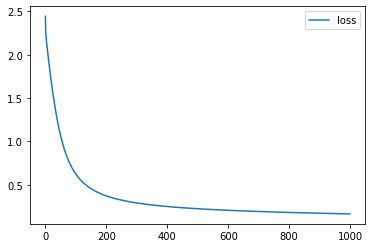

In [82]:
plt.plot(NN.loss, label='loss')
plt.legend()